In [ ]:
%pip install joblib scikit-learn pandas matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [3]:
df = pd.read_csv('../../data/data_set.csv', encoding='latin-1')
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Drop columns not needed
if 'Email No.' in df.columns:
    df = df.drop(columns='Email No.')

# Ensure data is numeric and clean
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = SVC(kernel='linear')  # You can also try 'rbf' or others
model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9594202898550724

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



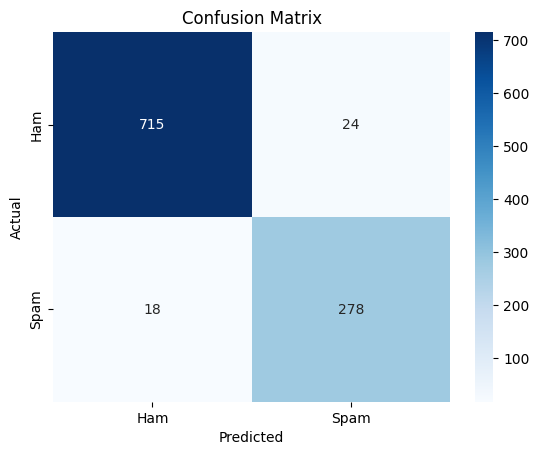

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
joblib.dump(model, 'svm_model.pkl')
print("Model saved as svm_model.pkl")


Model saved as svm_model.pkl


In [11]:
feature_columns = X_train.columns
joblib.dump(list(feature_columns), 'feature_columns.pkl')
print("Feature columns saved!")


Feature columns saved!


In [12]:
import string

def predict_email_spam(email_text, model, feature_columns):
    text = email_text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    email_vector = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)
    for word in words:
        if word in feature_columns:
            email_vector.at[0, word] = 1
    prediction = model.predict(email_vector)[0]
    return "Spam" if prediction == 1 else "Ham"


In [14]:
feature_columns = joblib.load('feature_columns.pkl')
model = joblib.load('svm_model.pkl')

test_email = "You have won a free cruise! Click here to claim your prize!"
result = predict_email_spam(test_email, model, feature_columns)
print("Prediction:", result)


Prediction: Spam
